## Basics of Pytorch

### Matrices
<p>
In pytorch, matrix(array) is called tensors.<br>
3*3 matrix koy. This is 3x3 tensor.<br>
Lets look at array example with numpy that we already know.<br>
We create numpy array with np.numpy() method<br>
Type(): type of the array. In this example it is numpy<br>
np.shape(): shape of the array. Row x Column<br>
</p>

In [4]:
# import numpy library
import numpy as np

# numpy array
array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


<p>
We looked at numpy array.<br>
Now examine how we implement tensor(pytorch array)<br>
import pytorch library with import torch<br>
We create tensor with torch.Tensor() method<br>
type: type of the array. In this example it is tensor<br>
shape: shape of the array. Row x Column<br>
</p>

In [6]:
import torch
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x11e4594f0>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


<p>
In order to learn, compare numpy and tensor<br>
np.ones() = torch.ones()<br>
np.random.rand() = torch.rand()<br>
</p>

In [8]:
print("Numpy ", np.ones((2, 3)))
print(torch.ones((2, 3)))

Numpy  [[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [9]:
print("Numpy ", np.random.rand(2, 3))
print(torch.rand(2, 3))

Numpy  [[0.99825047 0.2483962  0.502094  ]
 [0.03388896 0.17328144 0.36610366]]
tensor([[0.2390, 0.7076, 0.7631],
        [0.1940, 0.3649, 0.3017]])


<p>
Lets look at conversion between tensor and numpy arrays.<br>
torch.from_numpy(): from numpy to tensor<br>
numpy(): from tensor to numpy<br>
</p>

In [11]:
# random numpy array
array = np.random.rand(2, 3)
print("{}{}\n".format(type(array), array))

# from numpy to tensor
array_to_tensor = torch.from_numpy(array)
print(array_to_tensor)

#from tensor to numpy
tensor_to_numpy = array_to_tensor.numpy()
print("{}{}\n".format(type(tensor_to_numpy),tensor_to_numpy))

<class 'numpy.ndarray'>[[0.45686055 0.68573529 0.15713158]
 [0.25693955 0.2332999  0.83828232]]

tensor([[0.4569, 0.6857, 0.1571],
        [0.2569, 0.2333, 0.8383]], dtype=torch.float64)
<class 'numpy.ndarray'>[[0.45686055 0.68573529 0.15713158]
 [0.25693955 0.2332999  0.83828232]]



### Basic Math with Pytorch
<p>
Resize: view()<br>
a and b are tensor.<br>
Addition: torch.add(a,b) = a + b<br>
Subtraction: a.sub(b) = a - b<br>
Element wise multiplication: torch.mul(a,b) = a * b<br>
Element wise division: torch.div(a,b) = a / b<br>
Mean: a.mean()<br>
Standart Deviation (std): a.std()<br>
</p>

In [13]:
# create a tensor
tensor = torch.rand(2, 3)
print(tensor)

# Resize
print("Resize to (6, 1)\n", tensor.view(6, 1))

# Add
print("Add: ", torch.add(tensor, tensor))

# Sub
print("Sub: ", torch.sub(tensor + 1, tensor))

# Mul
print("Mul: ", torch.mul(tensor, tensor))

# Div
print("Div: ", torch.div(tensor, tensor))

# Mean
print("Mean: ", torch.mean(tensor))

# Std
print("Std: ", torch.std(tensor))

tensor([[0.6523, 0.6866, 0.4068],
        [0.0498, 0.8364, 0.4339]])
Resize to (6, 1)
 tensor([[0.6523],
        [0.6866],
        [0.4068],
        [0.0498],
        [0.8364],
        [0.4339]])
Add:  tensor([[1.3046, 1.3731, 0.8136],
        [0.0997, 1.6728, 0.8678]])
Sub:  tensor([[1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000]])
Mul:  tensor([[0.4255, 0.4714, 0.1655],
        [0.0025, 0.6996, 0.1883]])
Div:  tensor([[1., 1., 1.],
        [1., 1., 1.]])
Mean:  tensor(0.5110)
Std:  tensor(0.2779)


### Variables
<p>
It accumulates gradients.<br>
Difference between variables and tensor is variable accumulates gradients.<br>
We can make math operations with variables, too.<br>
In order to make backward propagation we need variables</p>

In [15]:
from torch.autograd import Variable

# define Variable
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

<p>
Assume we have equation y = x^2<br>
Define x = [2,4] variable<br>
After calculation we find that y = [4,16] (y = x^2)<br>
Recap o equation is that o = (1/2)sum(y) = (1/2)sum(x^2)<br>
deriavative of o = x<br>
Result is equal to x so gradients are [2,4]<br>
</p>

In [17]:
x = Variable(torch.tensor((2, 4), dtype = float), requires_grad = True)
y = x**2
print("y: ", y)
o = (1/2)*sum(y)
print("o: ", o)
o.backward()
print("gradients: ", x.grad)

y:  tensor([ 4., 16.], dtype=torch.float64, grad_fn=<PowBackward0>)
o:  tensor(10., dtype=torch.float64, grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.], dtype=torch.float64)


## Linear Regression

<p>
Detailed linear regression tutorial is in my machine learning tutorial in part "Regression". I will not explain it in here detailed.<br>
y = Ax + B.<br>
A = slope of curve<br>
B = bias (point that intersect y-axis)<br>
For example, we have car company. If the car price is low, we sell more car. If the car price is high, we sell less car. This is the fact that we know and we have data set about this fact.<br>
The question is that what will be number of car sell if the car price is 100.<br>
</p>

In [20]:
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array, dtype =np.float32)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np.reshape(-1, 1)))

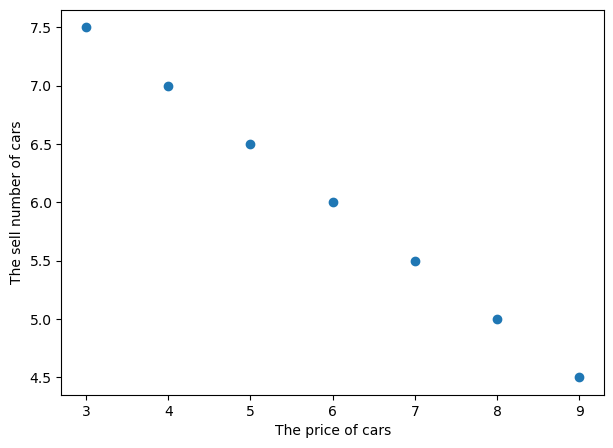

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7, 5))
plt.scatter(x = car_prices_array, y = number_of_car_sell_array) 
plt.xlabel("The price of cars")
plt.ylabel("The sell number of cars")
plt.show()

<p>
Steps of Linear Regression<br>
create LinearRegression class<br>
define model from this LinearRegression class<br>
MSE: Mean squared error<br>
Optimization (SGD:stochastic gradient descent)<br>
Backpropagation<br>
Prediction<br>
</p>

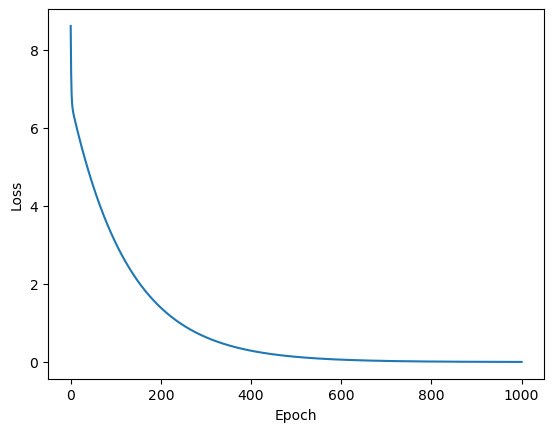

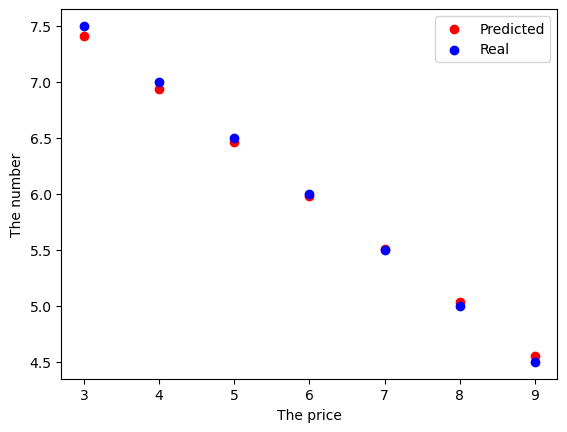

when price is 11, number is  tensor([3.6056])


In [23]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import matplotlib.pyplot as plt


# create LinearRegression class
class LinearRegression(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.model = nn.Sequential(nn.Linear(in_dim, out_dim))

    def forward(self, x):
        return self.model(x)

# define model from this LinearRegression class
in_dim = 1
out_dim = 1
mymodel = LinearRegression(in_dim = in_dim, out_dim = out_dim)

# MSE: Mean squared error
mse = nn.MSELoss()

# Optimization (SGD:stochastic gradient descent)
lr = 0.02
optimizer = torch.optim.SGD(mymodel.parameters(), lr = lr)

# Training
loss_list = []
for epoch in range(1001):
    optimizer.zero_grad()
    output = mymodel(car_price_tensor)
    loss = mse(output, number_of_car_sell_tensor)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.data)


plt.plot(range(1001), loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Prediction
predicted = mymodel(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, predicted, label = "Predicted", color = "red")
plt.scatter(car_prices_array, number_of_car_sell_array, label = "Real", color = "blue")
plt.legend()
plt.xlabel("The price")
plt.ylabel("The number")
plt.show()

x = np.array([11], dtype = np.float32)
y = torch.from_numpy(x)
print("when price is 11, number is ",mymodel(y).data)

## Logistic Regression

<p>
Linear regression is not good at classification.<br>
We use logistic regression for classification.<br>
linear regression + logistic function(softmax) = logistic regression<br>
</p>

### Import Libraries

In [27]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

### Prepare Dataset
<p>
We use MNIST dataset.<br>
There are 28*28 images and 10 labels from 0 to 9<br>
Data is not normalized so we divide each image to 255 that is basic normalization for images.<br>
In order to split data, we use train_test_split method from sklearn library<br>
Size of train data is 80% and size of test data is 20%.<br>
Create feature and target tensors. At the next parts we create variable from these tensors. As you remember we need to define variable for accumulation of gradients.<br>
batch_size = batch size means is that for example we have data and it includes 1000 sample. We can train 1000 sample in a same time or we can divide it 10 groups which include 100 sample and train 10 groups in order. Batch size is the group size. For example, I choose batch_size = 100, that means in order to train all data only once we have 336 groups. We train each groups(336) that have batch_size(quota) 100. Finally we train 33600 sample one time.<br>
epoch: 1 epoch means training all samples one time.<br>
In our example: we have 33600 sample to train and we decide our batch_size is 100. Also we decide epoch is 29(accuracy achieves almost highest value when epoch is 29). Data is trained 29 times. Question is that how many iteration do I need? Lets calculate:<br>
training data 1 times = training 33600 sample (because data includes 33600 sample)<br>
But we split our data 336 groups(group_size = batch_size = 100) our data<br>
Therefore, 1 epoch(training data only once) takes 336 iteration<br>
We have 29 epoch, so total iterarion is 9744(that is almost 10000 which I used)<br>
TensorDataset(): Data set wrapping tensors. Each sample is retrieved by indexing tensors along the first dimension.<br>
DataLoader(): It combines dataset and sample. It also provides multi process iterators over the dataset.<br>
Visualize one of the images in dataset<br>
</p>

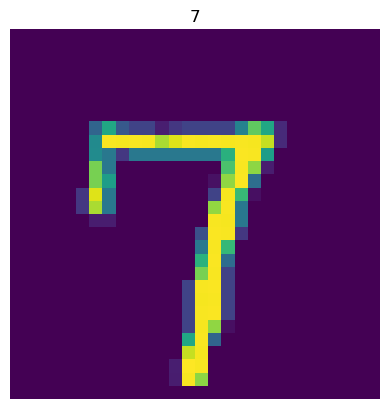

In [29]:
# load data
train = pd.read_csv("/Users/baijingyuan/jupyterPj/pytorch_practice/data/train_mnist.csv")

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != "label"].values/255

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy, 
                                                                              targets_numpy, test_size = 0.2, random_state = 42)
# create feature and targets tensor for train set. 
#As you remember we need variable to accumulate gradients. 
#Therefore first we create tensor, then we will create variable
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[6].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[6]))
plt.savefig('graph.png')
plt.show()

### Create model

In [31]:
# Create Logistic Regression Model
class LogisticRegression(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.model = nn.Linear(in_dim, out_dim)

    def forward(self, x):
        return self.model(x)

### Instantiate

In [33]:
# Instantiate Model Class
in_dim = 28 * 28
out_dim = 10

# create logistic regression model
mymodel = LinearRegression(in_dim, out_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer 
lr = 0.001
optimizer = torch.optim.SGD(mymodel.parameters(), lr)

### Training

In [35]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Define variables
        train = Variable(images.view(-1, 28 * 28)).float()
        labels = Variable(labels)

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        output = mymodel(train)

        # Calculate softmax and cross entropy loss
        loss = error(output, labels)

        # Calculate gradients
        loss.backward()

        # Update parameters
        optimizer.step()

        count += 1
        # Prediction
        if count % 50 == 0:
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28 * 28)).float()

                # Forward propagation
                output = mymodel(test)

                # Get predictions from the maximum value
                predicted = torch.max(output.data, 1)[1]

                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)

        if count % 500 == 0:
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.8231805562973022  Accuracy: 66.42857360839844%
Iteration: 1000  Loss: 1.5984820127487183  Accuracy: 75.22618865966797%
Iteration: 1500  Loss: 1.306795358657837  Accuracy: 78.41666412353516%
Iteration: 2000  Loss: 1.2023431062698364  Accuracy: 80.13095092773438%
Iteration: 2500  Loss: 1.0412598848342896  Accuracy: 81.11904907226562%
Iteration: 3000  Loss: 0.9350392818450928  Accuracy: 81.96428680419922%
Iteration: 3500  Loss: 0.8991405963897705  Accuracy: 82.46428680419922%
Iteration: 4000  Loss: 0.7561919689178467  Accuracy: 82.96428680419922%
Iteration: 4500  Loss: 0.980014443397522  Accuracy: 83.48809814453125%
Iteration: 5000  Loss: 0.8043559789657593  Accuracy: 83.79762268066406%
Iteration: 5500  Loss: 0.7584383487701416  Accuracy: 84.1547622680664%
Iteration: 6000  Loss: 0.858574628829956  Accuracy: 84.5%
Iteration: 6500  Loss: 0.6630892753601074  Accuracy: 84.80952453613281%
Iteration: 7000  Loss: 0.7179068922996521  Accuracy: 84.96428680419922%
Iteration:

### Visualization

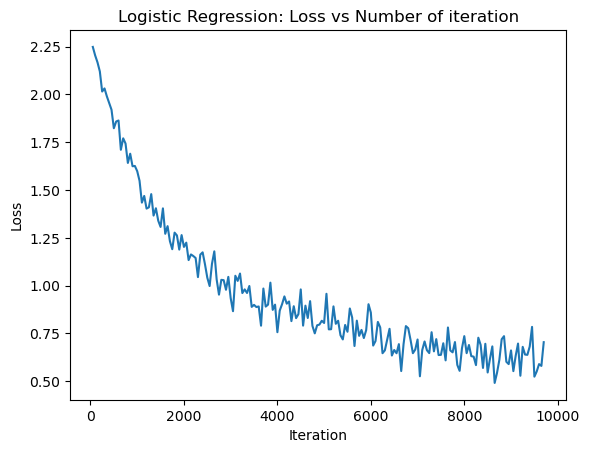

In [37]:
# visualization
plt.plot(iteration_list, loss_list)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

## Artificial Neural Network (ANN)

<p>
Logistic regression is good at classification but when complexity(non linearity) increases, the accuracy of model decreases.<br>
Therefore, we need to increase complexity of model.<br>
In order to increase complexity of model, we need to add more non linear functions as hidden layer.<br>
</p>

## Import Libraries

In [41]:
import torch
import torch.nn as nn
from torch.autograd import Variable

device = torch.device("mps")

### Prepare Dataset
Totally same with previous part(logistic regression).
We use same dataset so we only need train_loader and test_loader.
We use same batch size, epoch and iteration numbers.

### Prepare Dataset
<p>
Totally same with previous part(logistic regression).<br>
We use same dataset so we only need train_loader and test_loader.<br>
We use same batch size, epoch and iteration numbers.</p>

In [44]:
data_path = "/Users/baijingyuan/jupyterPj/pytorch_practice/data/train_mnist.csv"
train = pd.read_csv(data_path)
# split data into features(pixels) and labels(numbers from 0 to 9)
labels = train.label.values
features = train.loc[:, train.columns != "label"].values/255 # normalization
# train test split. Size of train data is 80% and size of test data is 20%. 
# create feature and targets tensor for train set. 
features_train, features_test, targets_train, targets_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

#As you remember we need variable to accumulate gradients. 
#Therefore first we create tensor, then we will create variable
fraturesTest = (torch.from_numpy(features_test).float()).to(device)
fraturesTrain = (torch.from_numpy(features_train).float()).to(device)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)
# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)


### Create ANN Model
<p>
We add 3 hidden layers.<br>
We use ReLU, Tanh and ELU activation functions for diversity.</p>

In [46]:
class ANNModel(nn.Module):
    def __init__(self, in_dim, hid_dim, out_dim):
        super().__init__()
        # layer 1
        self.model = nn.Sequential(nn.Linear(in_dim, hid_dim), nn.ReLU(),
                                  nn.Linear(hid_dim, hid_dim), nn.Tanh(),
                                  nn.Linear(hid_dim, hid_dim), nn.ELU(),
                                  nn.Linear(hid_dim, out_dim))

    def forward(self, x):
        return self.model(x)

### Instantiate

In [48]:
in_dim = 28 * 28
hid_dim = 350
out_dim = 10

mymodel = ANNModel(in_dim, hid_dim, out_dim)

error = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(mymodel.parameters(), lr)
lr = 0.03

### Training

In [78]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28 * 28)).float()
        labels = Variable(labels)

        optimizer.zero_grad()

        predicted = mymodel(train)
        loss = error(predicted, labels)

        loss.backward()
        
        optimizer.step()

        count += 1

        if count % 50 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28 * 28)).float()

                predicted = mymodel(test)

                output = torch.max(predicted.data, 1)[1]

                total += len(labels)

                correct += (output == labels).sum()

                accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))


Iteration: 500  Loss: 0.5939731001853943  Accuracy: 83.8452377319336 %
Iteration: 1000  Loss: 0.6775556206703186  Accuracy: 84.42857360839844 %
Iteration: 1500  Loss: 0.5258488059043884  Accuracy: 84.77381134033203 %
Iteration: 2000  Loss: 0.5496237874031067  Accuracy: 85.45237731933594 %
Iteration: 2500  Loss: 0.5028190016746521  Accuracy: 85.78571319580078 %
Iteration: 3000  Loss: 0.38136008381843567  Accuracy: 86.21428680419922 %
Iteration: 3500  Loss: 0.45659542083740234  Accuracy: 86.57142639160156 %
Iteration: 4000  Loss: 0.3251460790634155  Accuracy: 86.71428680419922 %
Iteration: 4500  Loss: 0.6044302582740784  Accuracy: 86.91666412353516 %
Iteration: 5000  Loss: 0.39184868335723877  Accuracy: 87.20237731933594 %
Iteration: 5500  Loss: 0.4495466947555542  Accuracy: 87.5 %
Iteration: 6000  Loss: 0.5696786642074585  Accuracy: 87.5952377319336 %
Iteration: 6500  Loss: 0.36246541142463684  Accuracy: 87.83333587646484 %
Iteration: 7000  Loss: 0.4800829589366913  Accuracy: 87.9166641

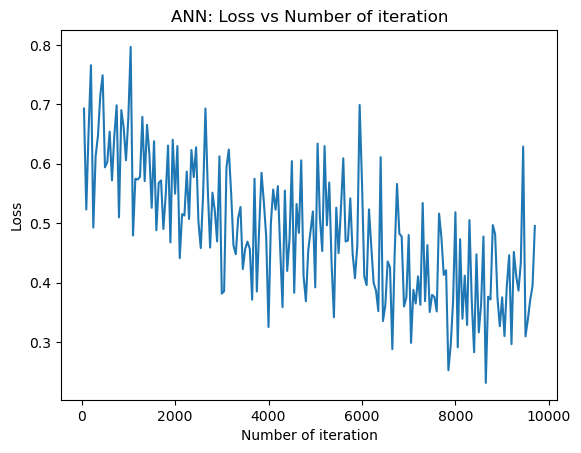

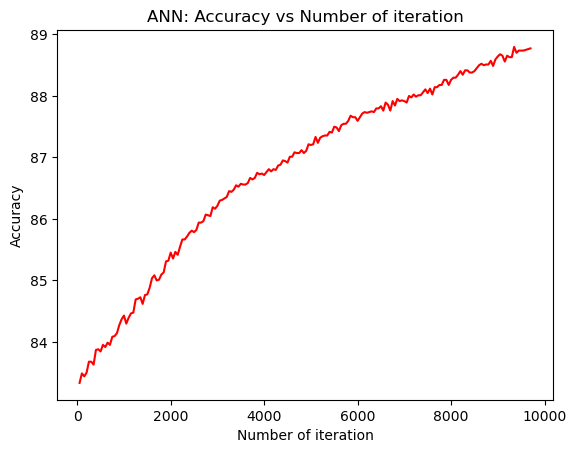

In [86]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()